In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import librosa
import librosa.display as ld
import os
import IPython.display as ipd
from IPython.display import Audio

In [3]:
ravdess="D:/RAAM/data_for_project/ravdess/"
lst_ravdess_directory =os.listdir(path=ravdess)
lst_ravdess_directory

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24',
 'audio_speech_actors_01-24']

In [4]:
crema="D:/RAAM/data_for_project/cremad/AudioWAV"
tess="D:/RAAM/data_for_project/toronto/TESS Toronto emotional speech set data"
savee="D:/RAAM/data_for_project/savee/ALL"

## For Ravdess - Dataset

In [7]:
file_emotion = []
file_path = []
f1=[]
for i in lst_ravdess_directory:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        if len(part)>=2:
            file_emotion.append(int(part[2]))
            file_path.append(ravdess + i + '/' + f)
        
    
print(file_path[0])
print(file_emotion[0])

D:/RAAM/data_for_project/ravdess/Actor_01/03-01-01-01-01-01-01.wav
1


In [8]:
print(file_path[0:4])
print(file_emotion[0:4])

['D:/RAAM/data_for_project/ravdess/Actor_01/03-01-01-01-01-01-01.wav', 'D:/RAAM/data_for_project/ravdess/Actor_01/03-01-01-01-01-02-01.wav', 'D:/RAAM/data_for_project/ravdess/Actor_01/03-01-01-01-02-01-01.wav', 'D:/RAAM/data_for_project/ravdess/Actor_01/03-01-01-01-02-02-01.wav']
[1, 1, 1, 1]


In [9]:
rav_df=pd.DataFrame({'Emotions':file_emotion,'Path':file_path})
rav_df.tail()

,Emotions,Path
1435,8,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...
1436,8,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...
1437,8,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...
1438,8,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...
1439,8,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...


In [10]:
rav_df['Emotions']=rav_df['Emotions'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'})
rav_df

,Emotions,Path
0,neutral,D:/RAAM/data_for_project/ravdess/Actor_01/03-0...
1,neutral,D:/RAAM/data_for_project/ravdess/Actor_01/03-0...
2,neutral,D:/RAAM/data_for_project/ravdess/Actor_01/03-0...
3,neutral,D:/RAAM/data_for_project/ravdess/Actor_01/03-0...
4,neutral,D:/RAAM/data_for_project/ravdess/Actor_01/03-0...
...,...,...
1435,surprise,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...
1436,surprise,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...
1437,surprise,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...
1438,surprise,D:/RAAM/data_for_project/ravdess/Actor_24/03-0...


## Crema-D Dataset Data-Extraction

In [11]:
crema_directory_lst=os.listdir(crema)
file_emotion,file_path = [],[]

for i in crema_directory_lst:
       # storing file paths
    file_path.append(crema + i)
    # storing file emotions
    part=i.split('_')
    print(part)
    break

['1042', 'IWW', 'ANG', 'XX.wav']


In [12]:
crema_directory_lst=os.listdir(crema)
file_emotion,file_path = [],[]

for i in crema_directory_lst:
       # storing file paths
    file_path.append(crema +"/"+ i)
    # storing file emotions
    part=i.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
crem_df=pd.DataFrame({'Emotions':file_emotion,'Path':file_path})
print(crem_df.head())
print(crem_df['Emotions'].value_counts())

  Emotions                                               Path
0    angry  D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
1  disgust  D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
2     fear  D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
3    happy  D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
4  neutral  D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
angry      692
disgust    692
fear       692
happy      692
sad        692
neutral    593
Name: Emotions, dtype: int64


## Toronto - Dataset Extraction

In [15]:
tess_direc= os.listdir(tess)

file_emotion, file_path =[],[]

for i in tess_direc:
    directories = os.listdir(tess+'/'+i)
    for j in directories:
        part=j.split(".")[0]
        part = part.split("_")[-1]
        #print(part)
        
        if part=='ps':
            file_emotion.append('surprise')
            
        if part=='Sad':
            file_emotion.append("sad")
        if part=='Fear':
            file_emotion.append("fear")
        if part=='surprised':
            file_emotion.append("surprise")
            
        else:
            file_emotion.append(part)
            
        file_path.append(tess+i+'/'+j)
        
        
#tess_df=pd.DataFrame({'Emotions':file_emotion,'Path':file_path})
#print(tess_df.head())
#print(tess_df['Emotions'].value_counts())
len(file_emotion),len(file_path)

(3216, 2814)

## Savee-Dataset Extraction

In [16]:
savee_directory_list = os.listdir(savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(savee +'/'+ file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
        
    else:
        file_emotion.append('surprise')
        
savee_df=pd.DataFrame({'Emotions':file_emotion,'Path':file_path})
print(savee_df.head())
print(savee_df['Emotions'].value_counts())

  Emotions                                           Path
0    angry  D:/RAAM/data_for_project/savee/ALL/DC_a01.wav
1    angry  D:/RAAM/data_for_project/savee/ALL/DC_a02.wav
2    angry  D:/RAAM/data_for_project/savee/ALL/DC_a03.wav
3    angry  D:/RAAM/data_for_project/savee/ALL/DC_a04.wav
4    angry  D:/RAAM/data_for_project/savee/ALL/DC_a05.wav
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: Emotions, dtype: int64


## Data - Combination

In [13]:
df=pd.concat([crem_df,rav_df,savee_df],axis=0)

In [189]:
print(df['Path'][0:1])

0    D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
Name: Path, dtype: object


In [14]:
df.reset_index(drop=True,inplace=True)
df

,Emotions,Path
0,angry,D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
1,disgust,D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
2,fear,D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
3,happy,D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
4,neutral,D:/RAAM/data_for_project/cremad/AudioWAV/1042_...
...,...,...
5968,surprise,D:/RAAM/data_for_project/savee/ALL/KL_su11.wav
5969,surprise,D:/RAAM/data_for_project/savee/ALL/KL_su12.wav
5970,surprise,D:/RAAM/data_for_project/savee/ALL/KL_su13.wav
5971,surprise,D:/RAAM/data_for_project/savee/ALL/KL_su14.wav


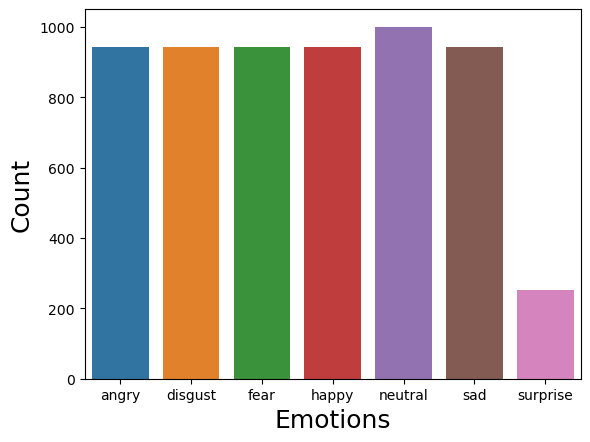

In [15]:
sns.countplot(x='Emotions',data=df)
plt.ylabel('Count',size=18)
plt.xlabel("Emotions",size=18)
#sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [16]:
file_path[1]

'D:/RAAM/data_for_project/savee/ALL/DC_a02.wav'

In [17]:
data,sr=librosa.load(file_path[1])
sr # sample rate ---- rate at which the audio stream of data is being sent in our workspace shell

22050

In [18]:
ipd.Audio(data,rate=sr)

## MEL-Spectrogram

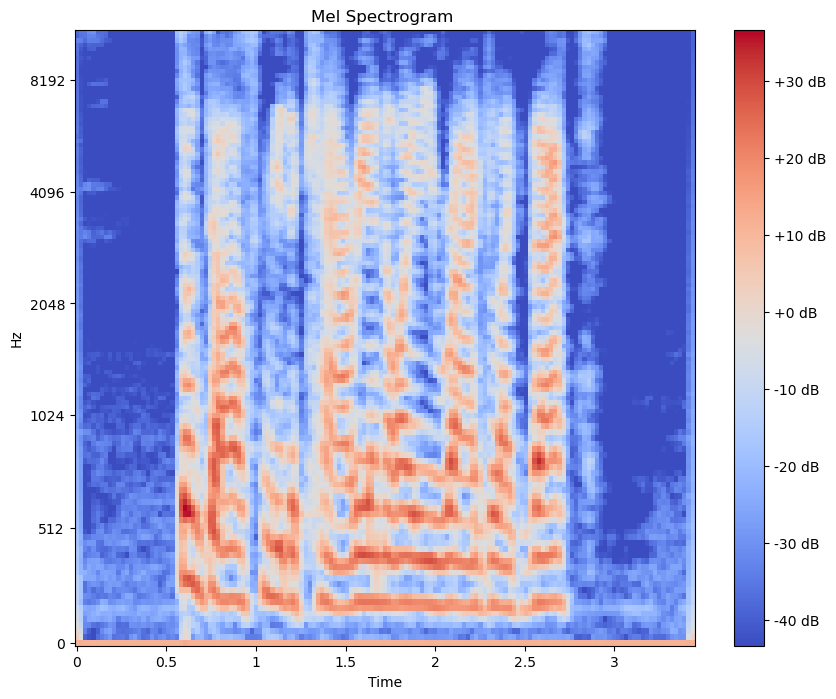

In [19]:
plt.figure(figsize=(10,8))
spectrogram= librosa.feature.melspectrogram(y=data,sr=sr,n_mels=128,fmax=4000)
log_spec=librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spec,y_axis='mel',sr=sr,x_axis='time')
#plt.title('')
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

## MFCC

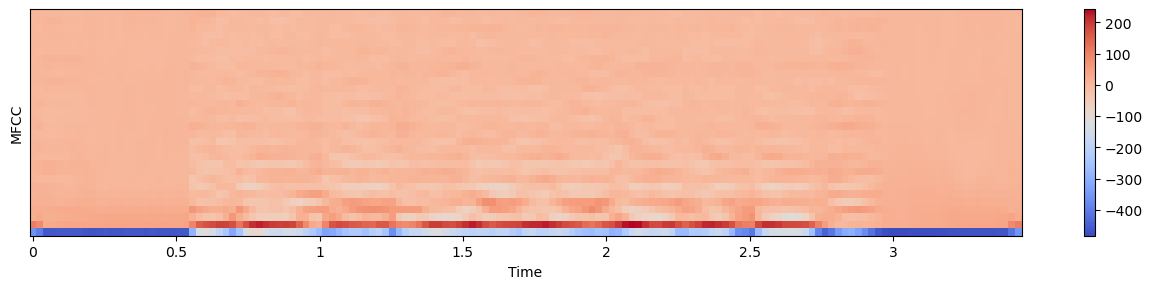

In [20]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [19]:
# NOISE
def noise(data):
    noise_amp = 0.036*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, n_steps=7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate,n_steps=n_steps)

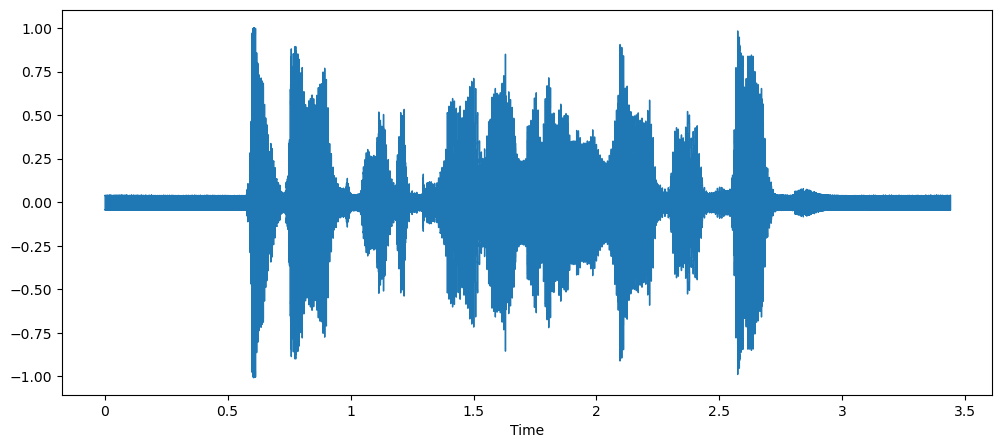

In [20]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

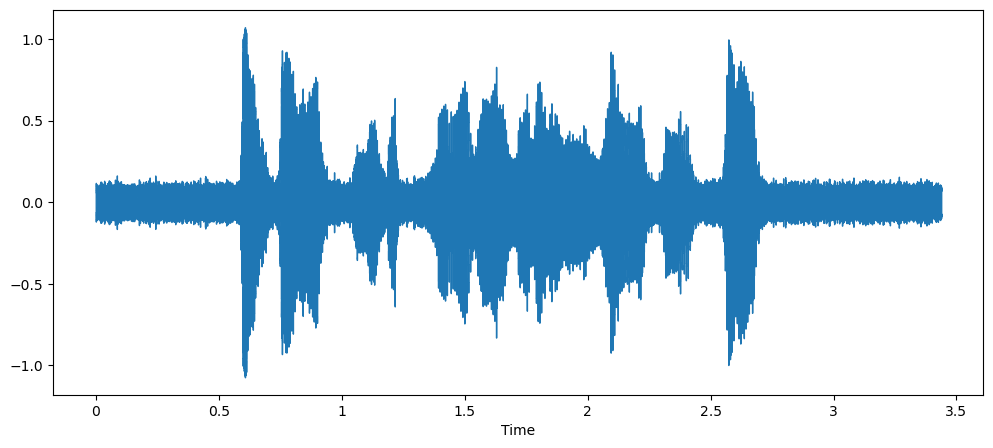

In [21]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

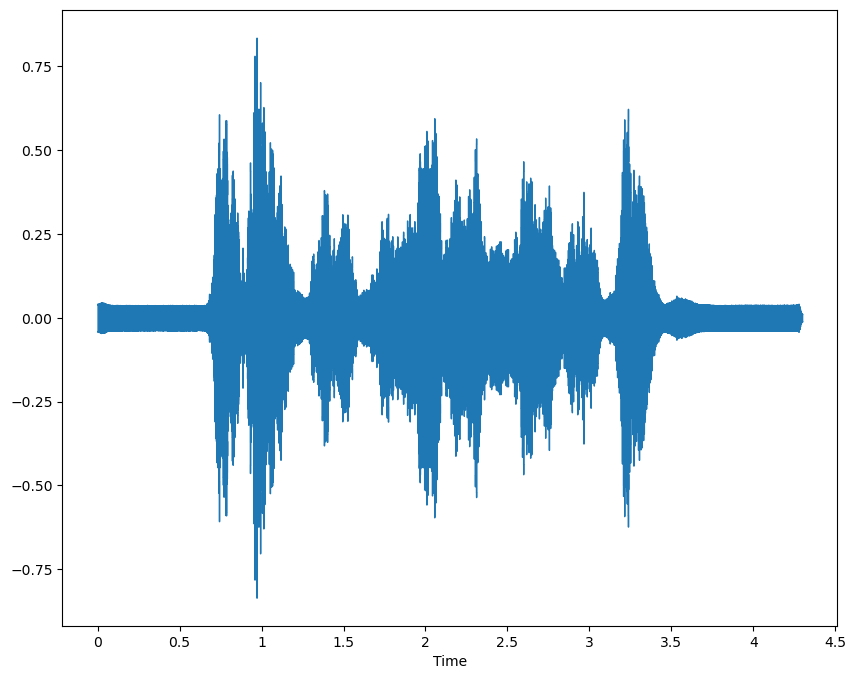

In [22]:
# Stretching
x=stretch(data)
plt.figure(figsize=(10,8))
librosa.display.waveshow(y=x,sr=sr)
ipd.Audio(x,rate=sr)

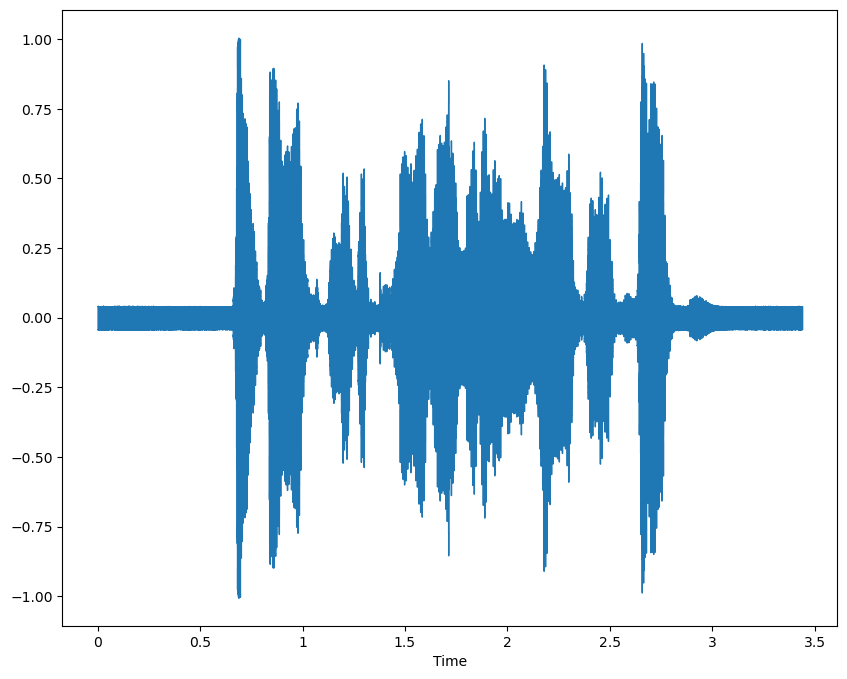

In [23]:
#Shifted Audio
x=shift(data)
plt.figure(figsize=(10,8))
librosa.display.waveshow(y=x,sr=sr)
ipd.Audio(x,rate=sr)

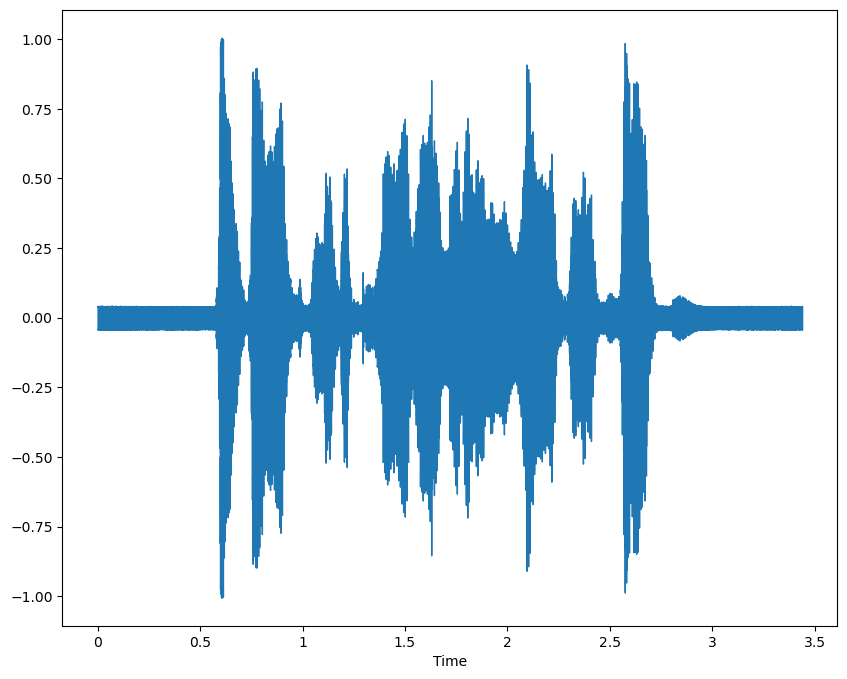

In [24]:
#pitched Audio
x=pitch(data, sr)
plt.figure(figsize=(10,8))
librosa.display.waveshow(y=data,sr=sr)
ipd.Audio(data,rate=sr)

# Feature Extraction

In [38]:
def zcr(data,frame_length,hop_length):# ZEro Crossing Rate
    zcr=librosa.feature.zero_crossing_rate(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr) # Try to convert into 1-D array.
def rmse(data,frame_length=2048,hop_length=512):# Root Mean Square of the Frequency(Amplitude)
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    # Standard Audio Feature----that clarify the alphabets pronounced
    mfcc=np.mean(librosa.feature.mfcc(y=data,sr=sr,n_mfcc=30).T,axis=0)
    return mfcc
#np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):#Audio-path is provided 
    data,sr=librosa.load(path=path,duration=duration,offset=offset) #path is being converted into readeable Data by Librosa
    
    aud=extract_features(data)# Extract  feature in h_stacked feature
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    return audio

### MFCC limits where put to 30 beacause models where not able to learn any good Features.(initially without mfcc_limit there were 2736 features that made our models into not-learn position)

### Stretch and Shift were flawing in our Extracted Dataset. So we excluded from Data-Augemented

## Number of Processor

In [39]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  12


## Extracting the zero crossing rate, Rmse and mfcc for our dataset

In [25]:
from joblib import Parallel, delayed
import timeit

In [26]:

start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = df.Path
emotions = df.Emotions

# Run the loop in parallel------12 audio files can be used to extract features at the Same time
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))
## n_jobs=-1 means shell can use all my processors
## delayed is a Decorator to adjust more Arguments in form of Objects into the Functions as Object-lEvel-VAriable.
# Delayed means Increasing the Arguments.
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)

NameError: name 'df' is not defined

## Extracted Model

In [96]:
X=pd.DataFrame(data=X)
Y1=pd.DataFrame(data=Y)

In [97]:
X

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,0.024414,0.033203,0.041504,0.038574,0.042969,0.047363,0.050293,0.050781,0.045898,0.040039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.029297,0.039062,0.056152,0.054199,0.060547,0.064941,0.059082,0.059570,0.072266,0.098145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.035156,0.047363,0.061035,0.063477,0.067871,0.077637,0.083984,0.077637,0.075684,0.073242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.017090,0.024414,0.034668,0.037598,0.039551,0.041992,0.039551,0.034180,0.034180,0.034180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.017090,0.024414,0.034668,0.039551,0.042480,0.044922,0.046387,0.041016,0.041992,0.046875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,0.017578,0.036621,0.082031,0.146973,0.200195,0.246094,0.271484,0.220215,0.168945,0.113281,...,-2.161271,-2.197246,-1.166646,-1.728829,-1.000754,-0.054712,-1.372779,-1.682552,-0.217664,1.376823
17915,0.025879,0.041504,0.071289,0.109863,0.125488,0.117676,0.105957,0.069336,0.056152,0.065918,...,-4.858939,3.333581,-0.931638,1.612089,1.649806,-0.643163,4.572688,5.281971,2.273499,4.040211
17916,0.000000,0.000000,0.006348,0.016113,0.025879,0.034180,0.036621,0.033691,0.032715,0.032227,...,-5.654725,-1.970415,2.806491,-7.815911,-1.054394,2.177704,-5.634877,-1.075640,0.431211,-0.280446
17917,0.212402,0.317871,0.391602,0.293457,0.201172,0.122070,0.137207,0.192871,0.197754,0.195312,...,-0.795994,-1.069067,-0.311641,-1.325133,-2.193001,-2.208342,-2.384787,-1.486259,-0.464390,-0.425917


In [99]:
Y1

,0
0,angry
1,angry
2,angry
3,disgust
4,disgust
...,...
17914,surprise
17915,surprise
17916,surprise
17917,surprise


# Data Preprocessing
## Checking for Null-Values

In [100]:
print(X.isna().sum())
# Because of Data-Augumentation which allows more features than Normal Data-Features....... 

0          0
1          0
2          0
3          0
4          0
       ...  
241    11115
242    11133
243    11133
244    11286
245    11286
Length: 246, dtype: int64


In [195]:
# Filling the null values
X=X.fillna(0)# Filling it with 0 only so that statically remain stable.
print(X.isnull().sum())
X.shape

0      0
1      0
2      0
3      0
4      0
      ..
241    0
242    0
243    0
244    0
245    0
Length: 246, dtype: int64


(17919, 246)

In [168]:
a1={'neutral':0,
   'angry':-3,
   'sad':-1,
   'disgust':1,
   'fear':-2,
   'happy':3,
   'surprise':2}
# Done so that we can use more Models (As Many mmodels needs 1D_Array(rows X 1) for Learning)

In [ ]:
# Because One-Hot_Encoding gives Multiclass Classification(rows X 7) then we can't Use Many Machine-Learning Models to Train.

In [105]:
# Replacing the Emotions with some Grade--- Ordinal Encoding
Y1=Y1.replace(a)
Y1.shape

(17919, 1)

In [107]:
print(Y1.shape)
X.shape

(17919, 1)


(17919, 246)

In [108]:
#Standardising = (X-X.mean())/X.std() for Each Columns.
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_new=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [109]:
x_new[1:10]

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
1,-0.613322,-0.664409,-0.652233,-0.664226,-0.632665,-0.609778,-0.647308,-0.648730,-0.576885,-0.427189,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757
2,-0.547569,-0.600845,-0.623632,-0.609369,-0.589086,-0.534019,-0.498813,-0.541076,-0.556609,-0.574446,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757
3,-0.750308,-0.776582,-0.778075,-0.762391,-0.757589,-0.746727,-0.763775,-0.800027,-0.802822,-0.805438,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757
4,-0.750308,-0.776582,-0.778075,-0.750842,-0.740157,-0.729245,-0.723011,-0.759293,-0.756476,-0.730365,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757
5,-0.684555,-0.705539,-0.703714,-0.672888,-0.647191,-0.630175,-0.635661,-0.672006,-0.704337,-0.640856,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757
6,-0.711952,-0.709278,-0.709434,-0.695985,-0.696579,-0.717589,-0.711365,-0.642911,-0.458124,-0.279931,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757
7,-0.690034,-0.660670,-0.646513,-0.632467,-0.638475,-0.682623,-0.699718,-0.642911,-0.400191,-0.204859,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757
8,-0.569486,-0.593367,-0.580732,-0.594933,-0.580371,-0.568984,-0.551223,-0.471247,-0.353845,-0.196197,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757
9,-0.662637,-0.686844,-0.706574,-0.710421,-0.734347,-0.735072,-0.728835,-0.733107,-0.713027,-0.730365,...,0.208388,-0.075088,0.157299,-0.150305,0.106916,-0.21065,0.123766,-0.236799,0.055375,-0.210757


## Dimension-Reduction 

In [52]:
from sklearn.decomposition import PCA
pca=PCA(n_components=246)

In [110]:
X1=x_new.copy()
X2=x_new.copy()

In [54]:
pca.fit(X1)
var=pca.explained_variance_ratio_
var
# Provides Weights to Each Columns and tells which column is more Significant will have Higher Weight Values.

array([1.10745339e-01, 3.72821988e-02, 2.42388920e-02, 2.26979331e-02,
       1.71786360e-02, 1.71257838e-02, 1.67594294e-02, 1.63239213e-02,
       1.43050504e-02, 1.39716296e-02, 1.36961466e-02, 1.34926872e-02,
       1.33706045e-02, 1.32715435e-02, 1.26752109e-02, 1.25470937e-02,
       1.24234512e-02, 1.20395645e-02, 1.18313032e-02, 1.17123968e-02,
       1.16727667e-02, 1.14098221e-02, 1.11907152e-02, 1.09748611e-02,
       1.08364435e-02, 1.06925496e-02, 1.06069420e-02, 1.03788769e-02,
       1.02770118e-02, 9.95891151e-03, 9.77889386e-03, 9.51323826e-03,
       9.44793650e-03, 9.28577293e-03, 9.16327940e-03, 9.05595602e-03,
       8.50843182e-03, 8.43977990e-03, 8.34256416e-03, 8.26296232e-03,
       8.21074768e-03, 8.09449456e-03, 8.01821441e-03, 7.98164339e-03,
       7.88693090e-03, 7.84123851e-03, 7.82686165e-03, 7.76149541e-03,
       7.75284952e-03, 7.68784661e-03, 7.64822642e-03, 7.63389037e-03,
       7.61645344e-03, 7.55362946e-03, 7.46966152e-03, 7.42294806e-03,
      

In [55]:
c=np.cumsum(np.round(var,decimals=4)*100)
#for i in range(len(c)):
   # if (c>95 and c<99):
       # print(i,"--------",c[i])
        
c1="Get the desired count "
c

array([11.07, 14.8 , 17.22, 19.49, 21.21, 22.92, 24.6 , 26.23, 27.66,
       29.06, 30.43, 31.78, 33.12, 34.45, 35.72, 36.97, 38.21, 39.41,
       40.59, 41.76, 42.93, 44.07, 45.19, 46.29, 47.37, 48.44, 49.5 ,
       50.54, 51.57, 52.57, 53.55, 54.5 , 55.44, 56.37, 57.29, 58.2 ,
       59.05, 59.89, 60.72, 61.55, 62.37, 63.18, 63.98, 64.78, 65.57,
       66.35, 67.13, 67.91, 68.69, 69.46, 70.22, 70.98, 71.74, 72.5 ,
       73.25, 73.99, 74.73, 75.46, 76.18, 76.88, 77.58, 78.28, 78.97,
       79.65, 80.3 , 80.91, 81.48, 82.04, 82.59, 83.14, 83.66, 84.17,
       84.65, 85.13, 85.6 , 86.07, 86.53, 86.98, 87.42, 87.85, 88.26,
       88.67, 89.08, 89.47, 89.85, 90.21, 90.56, 90.9 , 91.24, 91.56,
       91.87, 92.17, 92.47, 92.76, 93.04, 93.31, 93.56, 93.79, 94.02,
       94.24, 94.44, 94.64, 94.83, 95.  , 95.16, 95.31, 95.45, 95.59,
       95.73, 95.86, 95.98, 96.1 , 96.21, 96.32, 96.42, 96.52, 96.62,
       96.72, 96.82, 96.91, 97.  , 97.09, 97.18, 97.27, 97.36, 97.45,
       97.54, 97.63,

In [57]:
j=0
for i in c:
    print(j,"----------->",i)
    j+=1
    if i>=99.1:
        break

0 -----------> 11.07
1 -----------> 14.8
2 -----------> 17.22
3 -----------> 19.49
4 -----------> 21.209999999999997
5 -----------> 22.919999999999998
6 -----------> 24.599999999999998
7 -----------> 26.229999999999997
8 -----------> 27.659999999999997
9 -----------> 29.059999999999995
10 -----------> 30.429999999999996
11 -----------> 31.779999999999998
12 -----------> 33.12
13 -----------> 34.449999999999996
14 -----------> 35.72
15 -----------> 36.97
16 -----------> 38.21
17 -----------> 39.410000000000004
18 -----------> 40.59
19 -----------> 41.760000000000005
20 -----------> 42.93000000000001
21 -----------> 44.07000000000001
22 -----------> 45.190000000000005
23 -----------> 46.290000000000006
24 -----------> 47.370000000000005
25 -----------> 48.440000000000005
26 -----------> 49.50000000000001
27 -----------> 50.540000000000006
28 -----------> 51.57000000000001
29 -----------> 52.57000000000001
30 -----------> 53.550000000000004
31 -----------> 54.50000000000001
32 -----------

In [111]:
pca_res=PCA(n_components=152) #,svd_solver='randomised')
pca_res.fit(X1)

PCA(n_components=152)

In [112]:
pca_res.n_components_

152

In [113]:
x_new=pd.DataFrame(pca_res.transform(X1))

In [114]:
x_new.shape

(17919, 152)

In [115]:
x_new

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,-4.323844,-0.351979,-0.094617,-1.229931,-0.084421,0.382484,0.108163,-0.492551,-0.085922,-0.928812,...,-0.173175,0.128707,-0.074395,-0.080155,0.283306,-0.083083,0.334674,0.032427,-0.127702,-0.098548
1,3.388270,8.218111,-0.088736,2.599865,1.128067,-0.707337,0.083642,-0.064229,0.389987,-1.269247,...,0.042141,-0.067402,0.029302,-0.036034,0.088700,0.099715,0.493391,0.023910,-0.114526,-0.134731
2,-2.762366,-0.354023,-0.205125,-1.687426,0.004713,0.197802,0.083174,-0.459962,0.819108,-0.961527,...,-0.252554,0.213570,0.023838,0.019231,0.006629,0.090794,0.436410,-0.080591,-0.207765,0.187992
3,-5.254414,-0.832895,-0.056361,-1.174579,-0.272848,0.969901,0.305963,-1.411442,-1.697878,-0.786144,...,-0.109470,0.118027,-0.034507,0.039103,-0.062390,0.087853,0.237737,0.082098,-0.177126,0.017673
4,-4.168317,0.228600,0.007536,-0.462112,-0.019268,0.683114,0.359526,-1.083925,-1.139500,-0.822857,...,-0.077170,0.092594,0.039248,0.079304,-0.203593,0.177321,0.178598,0.178486,-0.123699,0.212385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,1.830249,2.588422,-0.460498,2.123725,0.111158,-1.679387,-0.253753,0.341144,-0.011799,-0.022412,...,-0.163973,0.208689,-0.124642,0.303408,-0.331373,0.017716,-0.388990,0.128277,0.387225,-0.425694
17915,-2.697016,-2.634174,2.932140,-1.308244,-0.432297,-2.668800,0.584377,-0.929936,-0.523316,1.963476,...,0.061986,0.318806,0.090978,0.001689,-0.546428,-0.186078,-0.310032,0.004485,0.011262,0.009184
17916,-4.775651,-3.292416,0.418527,2.603382,0.396851,-2.190808,-0.042044,0.497809,0.123606,-0.269814,...,-1.955457,-1.460868,-0.000016,0.925339,-0.812495,-0.237114,-0.050111,0.232970,0.445690,-0.480017
17917,6.779997,6.151275,-1.548617,3.869852,0.748232,-0.063532,0.928837,-2.395265,-0.067673,0.879945,...,0.139428,-0.285123,-0.023297,0.436361,-0.127421,-0.388528,-0.289882,0.167309,0.544030,-0.431168


In [138]:
Y2=np.array(Y1)
Y2

array([[-3],
       [-3],
       [-3],
       ...,
       [ 2],
       [ 2],
       [ 2]], dtype=int64)

## Model Splitting for Trainig

In [141]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x_new,Y2,test_size=0.3)# Spliting Happens Randomly
# x_tr,y_tr-----70% training Data
# x_te,y_te-----30% testing Data

In [142]:
y_tr.shape,y_te.shape

((12543, 1), (5376, 1))

## Model Training

### Descision Tree Model

In [143]:
from sklearn import tree
from sklearn import metrics as m# Evalution our model's-Learning
from sklearn.model_selection import cross_val_score# Grid spliting and then Evaluating

In [133]:
dt=tree.DecisionTreeClassifier()

In [134]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [121]:
y_pred_dt=dt.predict(x_te)
y_pred_dt_tr=dt.predict(x_tr)

In [122]:
print(m.classification_report(y_tr,y_pred_dt_tr))
#For Training it has Overfitting.

              precision    recall  f1-score   support

          -3       1.00      1.00      1.00      1929
          -2       1.00      1.00      1.00      2002
          -1       1.00      1.00      1.00      1976
           0       1.00      1.00      1.00      2125
           1       1.00      1.00      1.00      1996
           2       1.00      1.00      1.00       541
           3       1.00      1.00      1.00      1974

    accuracy                           1.00     12543
   macro avg       1.00      1.00      1.00     12543
weighted avg       1.00      1.00      1.00     12543



In [123]:
print(m.classification_report(y_te,y_pred_dt))

              precision    recall  f1-score   support

          -3       0.35      0.31      0.33       903
          -2       0.19      0.20      0.20       830
          -1       0.29      0.29      0.29       856
           0       0.30      0.31      0.30       878
           1       0.26      0.27      0.26       836
           2       0.24      0.20      0.22       215
           3       0.26      0.27      0.26       858

    accuracy                           0.27      5376
   macro avg       0.27      0.26      0.27      5376
weighted avg       0.27      0.27      0.27      5376



In [124]:
print("Test ",m.accuracy_score(y_te,y_pred_dt))
print("Train",m.accuracy_score(y_tr,y_pred_dt_tr))

Test  0.2726934523809524
Train 1.0


In [127]:
scores_test = cross_val_score(dt,x_new,Y,n_jobs=-1,scoring='f1_macro',cv=5)
print("WITH PCA scores ",scores_test,'\n',scores_test.mean())

WITH PCA scores  [0.23131632 0.21044932 0.2020333  0.21415206 0.16361667] 
 0.20431353343676778


In [128]:
scores_test = cross_val_score(dt,x_new,Y,n_jobs=-1,cv=5)
print("WITH PCA Accuracy scores ",scores_test,'\n',scores_test.mean())

WITH PCA Accuracy scores  [0.22377232 0.22237723 0.22209821 0.20145089 0.18476137] 
 0.2108920067730553


### GradientDescentBossting Model

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gdf=GradientBoostingClassifier()

In [137]:
gdf.fit(x_tr,y_tr)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [139]:
y_pred_dt=gdf.predict(x_te)
y_pred_dt_tr=gdf.predict(x_tr)

print("Train \n",m.classification_report(y_tr,y_pred_dt_tr))
print("\n------\n")
print("Test\n",m.classification_report(y_te,y_pred_dt))
print("Test ",m.accuracy_score(y_te,y_pred_dt))
print("Train",m.accuracy_score(y_tr,y_pred_dt_tr))

Train 
               precision    recall  f1-score   support

          -3       0.58      0.72      0.65      2026
          -2       0.64      0.48      0.55      1984
          -1       0.58      0.61      0.60      1989
           0       0.61      0.64      0.62      2092
           1       0.61      0.51      0.56      1925
           2       0.72      0.73      0.72       508
           3       0.56      0.60      0.58      2019

    accuracy                           0.60     12543
   macro avg       0.62      0.61      0.61     12543
weighted avg       0.60      0.60      0.60     12543


------

Test
               precision    recall  f1-score   support

          -3       0.40      0.55      0.47       806
          -2       0.29      0.21      0.24       848
          -1       0.38      0.39      0.39       843
           0       0.41      0.43      0.42       911
           1       0.39      0.31      0.34       907
           2       0.44      0.38      0.41       248
 

In [ ]:
scores_test = cross_val_score(gdf,x_new,Y2,n_jobs=-1,cv=5)
print("WITH PCA Accuracy scores ",scores_test,'\n',scores_test.mean())

### SVM Model

In [144]:
from sklearn.svm import SVC,LinearSVC
svc=SVC(kernel='rbf',random_state=42)

In [145]:
svc.fit(x_tr,y_tr)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [146]:
y_pred_dt=svc.predict(x_te)
y_pred_dt_tr=svc.predict(x_tr)

print("Train \n",m.classification_report(y_tr,y_pred_dt_tr))
print("\n------\n")
print("Test\n",m.classification_report(y_te,y_pred_dt))
print("Test ",m.accuracy_score(y_te,y_pred_dt))
print("Train",m.accuracy_score(y_tr,y_pred_dt_tr))

Train 
               precision    recall  f1-score   support

          -3       0.59      0.63      0.61      1984
          -2       0.43      0.36      0.39      1987
          -1       0.47      0.47      0.47      1932
           0       0.50      0.57      0.53      2079
           1       0.53      0.45      0.49      2010
           2       0.63      0.57      0.60       543
           3       0.44      0.49      0.47      2008

    accuracy                           0.50     12543
   macro avg       0.51      0.51      0.51     12543
weighted avg       0.50      0.50      0.50     12543


------

Test
               precision    recall  f1-score   support

          -3       0.50      0.53      0.52       848
          -2       0.33      0.29      0.31       845
          -1       0.37      0.37      0.37       900
           0       0.42      0.47      0.44       924
           1       0.45      0.38      0.41       822
           2       0.50      0.50      0.50       213
 

In [150]:
scores_test = cross_val_score(svc,x_new,Y2,n_jobs=-1,cv=5)
print("WITH PCA Accuracy scores ",scores_test,'\n',scores_test.mean())

WITH PCA Accuracy scores  [0.28180804 0.28655134 0.29436384 0.31222098 0.22802121] 
 0.2805930815408078


### KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [148]:
knn.fit(x_tr,y_tr)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [149]:
y_pred_dt=svc.predict(x_te)
y_pred_dt_tr=svc.predict(x_tr)

print("Train \n",m.classification_report(y_tr,y_pred_dt_tr))
print("\n------\n")
print("Test\n",m.classification_report(y_te,y_pred_dt))
print("Test ",m.accuracy_score(y_te,y_pred_dt))
print("Train",m.accuracy_score(y_tr,y_pred_dt_tr))

Train 
               precision    recall  f1-score   support

          -3       0.59      0.63      0.61      1984
          -2       0.43      0.36      0.39      1987
          -1       0.47      0.47      0.47      1932
           0       0.50      0.57      0.53      2079
           1       0.53      0.45      0.49      2010
           2       0.63      0.57      0.60       543
           3       0.44      0.49      0.47      2008

    accuracy                           0.50     12543
   macro avg       0.51      0.51      0.51     12543
weighted avg       0.50      0.50      0.50     12543


------

Test
               precision    recall  f1-score   support

          -3       0.50      0.53      0.52       848
          -2       0.33      0.29      0.31       845
          -1       0.37      0.37      0.37       900
           0       0.42      0.47      0.44       924
           1       0.45      0.38      0.41       822
           2       0.50      0.50      0.50       213
 

In [151]:
scores_test = cross_val_score(knn,x_new,Y2,n_jobs=-1,cv=5)
print("WITH PCA Accuracy scores ",scores_test,'\n',scores_test.mean())

WITH PCA Accuracy scores  [0.27287946 0.28348214 0.28794643 0.26674107 0.19201786] 
 0.26061339385391336


### Finding the Best Parameter by GridSearchCV

In [156]:
param={"C":[0.1,0.5,0.9],
       'kernel':['rbf','poly','sigmoid'],
       'gamma':['auto','scale']
}
# SVM is taken for Hyperparameter -Tuning because it has more parameter to be hyperparameter and More Advanced Learning.

In [157]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(svc,param_grid=param,n_jobs=-1,cv=5,verbose=2,return_train_score=True)
#To Find The Best Parameter for Our Model.

In [158]:
gs.fit(x_tr,y_tr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.9], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True, verbose=2)

In [159]:
gs.best_params_

{'C': 0.9, 'gamma': 'auto', 'kernel': 'poly'}

In [160]:
cv=pd.DataFrame(gs.cv_results_)
a=list(cv.columns)
a

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

## Ploting our Bias-Variance Trade off

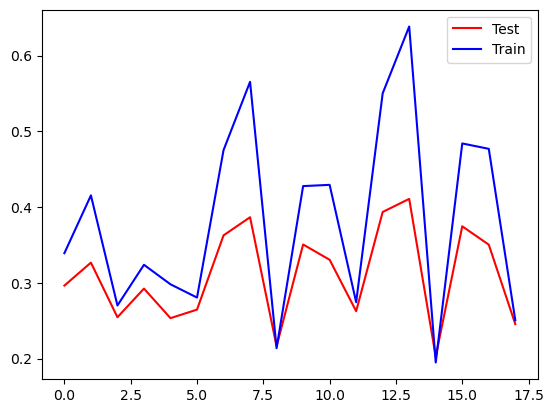

In [162]:
plt.plot(cv['mean_test_score'],color='red',label='Test')
plt.plot(cv['mean_train_score'],color='blue',label='Train')
plt.legend()

### Preparing Our Model with Best Parameters

In [163]:
svc=SVC(**gs.best_params_)
svc.fit(x_tr,y_tr)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.9, gamma='auto', kernel='poly')

In [164]:
y_pred_dt=svc.predict(x_te)
y_pred_dt_tr=svc.predict(x_tr)

print("Train \n",m.classification_report(y_tr,y_pred_dt_tr))
print("\n------\n")
print("Test\n",m.classification_report(y_te,y_pred_dt))
print("Test ",m.accuracy_score(y_te,y_pred_dt))
print("Train",m.accuracy_score(y_tr,y_pred_dt_tr))

Train 
               precision    recall  f1-score   support

          -3       0.54      0.83      0.66      1984
          -2       0.72      0.53      0.61      1987
          -1       0.67      0.60      0.63      1932
           0       0.65      0.68      0.66      2079
           1       0.68      0.58      0.63      2010
           2       0.85      0.62      0.72       543
           3       0.63      0.63      0.63      2008

    accuracy                           0.64     12543
   macro avg       0.68      0.64      0.65     12543
weighted avg       0.66      0.64      0.64     12543


------

Test
               precision    recall  f1-score   support

          -3       0.42      0.70      0.53       848
          -2       0.41      0.29      0.34       845
          -1       0.47      0.39      0.43       900
           0       0.47      0.48      0.47       924
           1       0.48      0.40      0.44       822
           2       0.51      0.44      0.47       213
 

# As our Model Test Accuracy is 43.65699
# ANd Our Model Train Accuracy is 64.14733

## Our Model

In [166]:
model=svc

### Pipeline

In [ ]:
paths=input("enter the path of the audio ")
def process_feature(path):
    features = get_features(paths)
    X = []
    #Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        #Y.append(emotion)
    return X
results = Parallel(n_jobs=-1)(delayed(process_feature)(path) for (path, emotion) in (paths))

X = []

for result in results:
    x= result
    X.extend(x)
    
X=X.fillna(0)
print(X.isnull().sum())
X.shape   

x_new=pd.DataFrame(ss.transform(X))
x_new=pd.DataFrame(pca_res.transform(x_new))
b=int(model.predict(x_new))

a1={0:'neutral',
   1:'disgust',
   2:'surprise',
   3:'happy',
   -1:'sad',
   -2:'fear',
   -3:'angry'}

if b in a1:
    print('The emotion is from our model is ',a1[b])

# Future Scope
## PiPeline is OUR Future Scope and 
## To Enhance the Accuracy we need to use Deep-Learning models like- LSTM,GRU ,1D-CNN.
## As Our Dataset is one of the Unstructured-Data So our Machine-Learning models has limit to its acuracy and That's why Deep-Learning Models are Better in those fit.